## Medical Cost Personal Datasets
### Visualization - Modeling
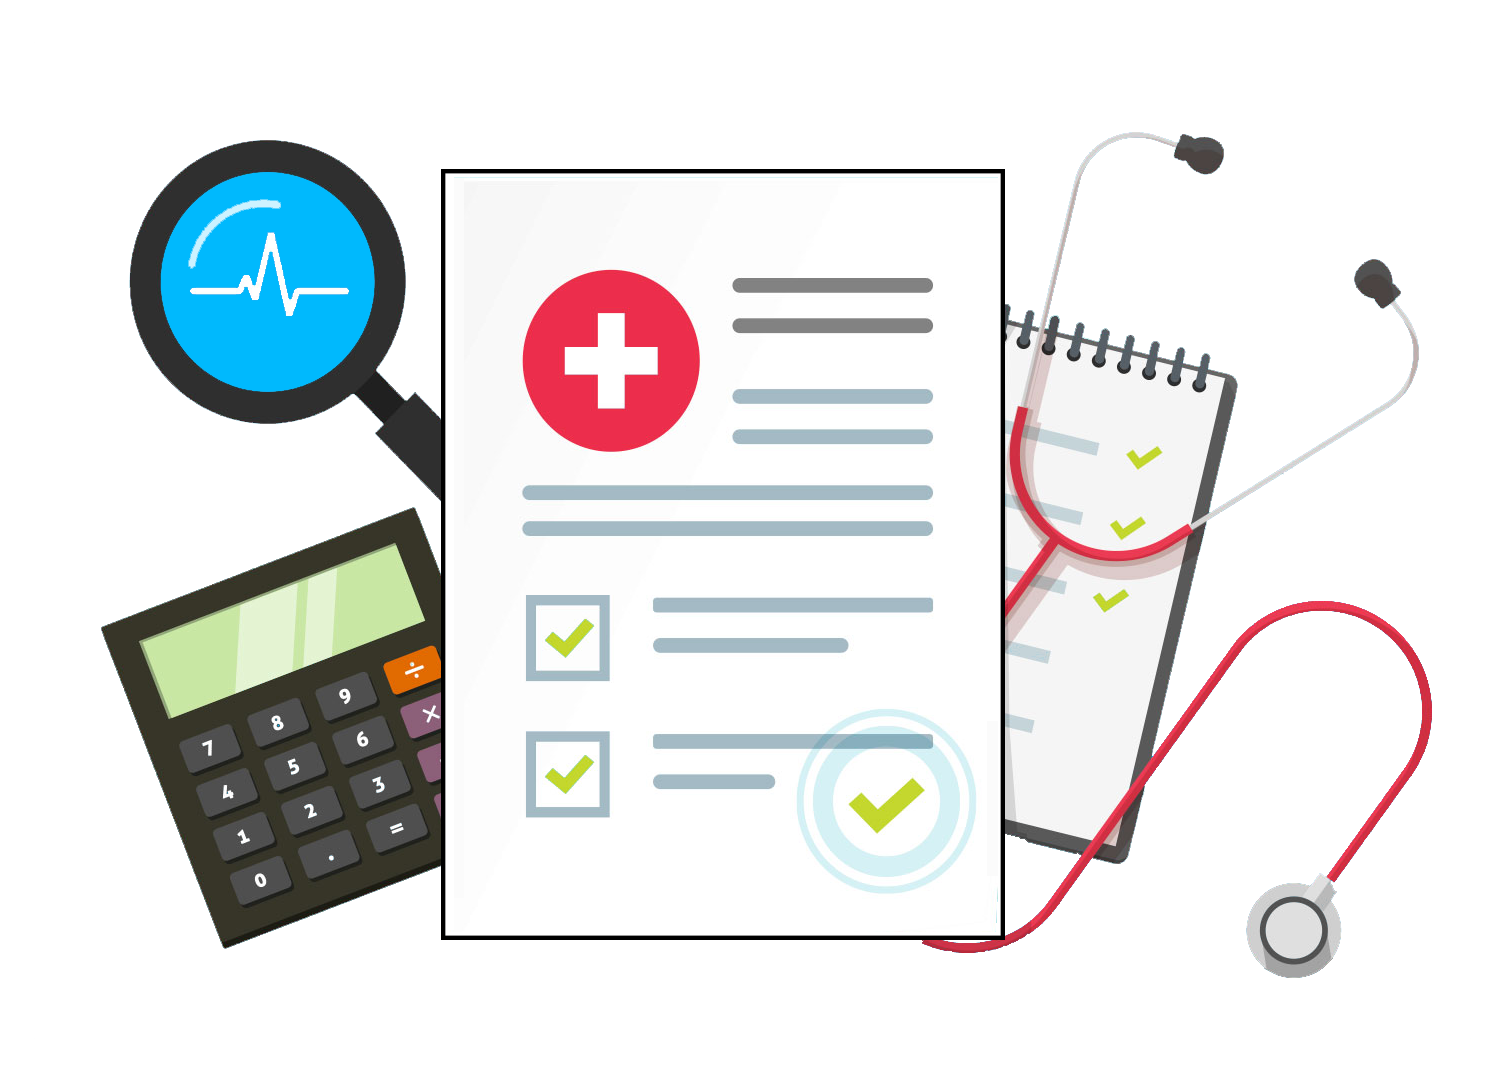

## We will first examine our data and visualize the features one by one

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Load and check data

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## Variable Description
#### age : age of primary beneficiary

#### sex : insurance contractor gender, female, male

#### bmi : Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

#### children : Number of children covered by health insurance / Number of dependents

#### smoker : Smoking

#### region : the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

#### charges : Individual medical costs billed by health insurance

In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#analysis: no missing data

In [7]:
df.isnull().sum() # the output shows no missing data

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##  Let’s artificially add missing values for the ‘children’ and ‘region’ columns, to demonstrate how we go about removing these values:

In [9]:
#df.loc[df.region == 'southwest', 'region'] = np.nan

In [10]:
#df.loc[df.children == 1, 'children'] = np.nan

In [11]:
#df.isnull().sum()

In [12]:
# We can use the ‘.dropna()’ method to remove these missing values.
#df.dropna(inplace=True)
#print(df.isnull().sum())

In [13]:
#df.shape

In [14]:
# Additionally, if you would like to fill missing values in a data frame you can use the ‘.fillna()’ method.
#df.fillna(0, inplace=True)

In [15]:
#Notice that the index has been modified since data was removed. We can fix this by using the ‘reset_index’ method:
#df.reset_index(inplace=True)
#del df['index']
#print(df.head())

## Filtering Data

In [16]:
#we want records corresponding to patients younger than 30 years old
df.loc[df['age'] < 30]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
10,25,male,26.220,0,no,northeast,2721.32080
12,23,male,34.400,0,no,southwest,1826.84300
...,...,...,...,...,...,...,...
1328,23,female,24.225,2,no,northeast,22395.74424
1331,23,female,33.400,0,no,southwest,10795.93733
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [17]:
df.loc[df['age'] < 30].shape

(417, 7)

In [18]:
#we want records corresponding to charges greater than $10,000
df.loc[df['charges'] > 10000]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
3,33,male,22.705,0,no,northwest,21984.47061
9,60,female,25.840,0,no,northwest,28923.13692
11,62,female,26.290,0,yes,southeast,27808.72510
13,56,female,39.820,0,no,southeast,11090.71780
...,...,...,...,...,...,...,...
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830


In [19]:
df.loc[df['charges'] > 10000].shape

(626, 7)

In [20]:
#We can also filter the data frame to only include smokers:
df[df['smoker'] == 'yes']

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [21]:
df[df['smoker'] == 'yes'].shape

(274, 7)

In [22]:
#Suppose we want to pull data corresponding to female smokers. 
df.loc[(df['sex'] == 'female') & (df['smoker'] == 'yes')]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
23,34,female,31.920,1,yes,northeast,37701.87680
58,53,female,22.880,1,yes,southeast,23244.79020
64,20,female,22.420,0,yes,northwest,14711.74380
...,...,...,...,...,...,...,...
1308,25,female,30.200,0,yes,southwest,33900.65300
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1323,42,female,40.370,2,yes,southeast,43896.37630


In [23]:
df.loc[(df['sex'] == 'female') & (df['smoker'] == 'yes')].shape

(115, 7)

In [24]:
#Let’s filter for female smokers over 50:
df.loc[(df['sex'] == 'female') & (df['smoker'] == 'yes') &(df['age'] >= 50)]

,age,sex,bmi,children,smoker,region,charges
11,62,female,26.290,0,yes,southeast,27808.72510
58,53,female,22.880,1,yes,southeast,23244.79020
86,57,female,31.160,0,yes,northwest,43578.93940
94,64,female,31.300,2,yes,southwest,47291.05500
103,61,female,29.920,3,yes,southeast,30942.19180
175,63,female,37.700,0,yes,southwest,48824.45000
244,63,female,27.740,0,yes,northeast,29523.16560
251,63,female,32.200,2,yes,southwest,47305.30500
288,59,female,36.765,1,yes,northeast,47896.79135
301,53,female,22.610,3,yes,northeast,24873.38490


In [25]:
#We can also select multiple rows within a column or many columns:
df.loc[0:3,'age' :'bmi']

,age,sex,bmi
0,19,female,27.900
1,18,male,33.770
2,28,male,33.000
3,33,male,22.705


## Aggregating Data & Generating Statistics
### Now we will discuss how to generate statistics from the data in our data frame. We can create separate data frames for specific categories and generate statistics from the resulting data frames.

In [26]:
#Let’s create separate data frames for male and female records:
df_male = df[df['sex'] == 'male']
df_male

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
8,37,male,29.830,2,no,northeast,6406.41070
...,...,...,...,...,...,...,...
1324,31,male,25.935,1,no,northwest,4239.89265
1325,61,male,33.535,0,no,northeast,13143.33665
1327,51,male,30.030,1,no,southeast,9377.90470
1329,52,male,38.600,2,no,southwest,10325.20600


In [27]:
df_female = df[df['sex'] == 'female']
df_female

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.68500
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


In [28]:
#Let’s get the average charge for females
round(df_female['charges'].mean(),2)

12569.58

In [29]:
#Let’s get the average charge for males
round(df_male['charges'].mean(),2)

13956.75

In [30]:
round(df['charges'].max(),2)

63770.43

In [31]:
#Another useful method is the ‘.groupby()’ method which can be used for aggregating data. 
#Let’s say we want to know the number of male and female smokers:
df_yes = df[df['smoker'] == 'yes']
df_yes  = df_yes.groupby(['sex'])['smoker'].count()
df_yes.head()

sex
female    115
male      159
Name: smoker, dtype: int64

In [32]:
#We can also use the ‘.groupby()’ method to pull the average medical cost across category types.
round(df.groupby(['sex'])['charges'].mean(),2)

sex
female    12569.58
male      13956.75
Name: charges, dtype: float64

In [33]:
#We can also generate these statistics for each region group:
round(df.groupby('region')['charges'].mean(),2)

region
northeast    13406.38
northwest    12417.58
southeast    14735.41
southwest    12346.94
Name: charges, dtype: float64

In [34]:
#It would also be interesting to look at the average medical cost for each smoker group:
round(df.groupby(['smoker','sex'])['charges'].mean(), 2)

smoker  sex   
no      female     8762.30
        male       8087.20
yes     female    30679.00
        male      33042.01
Name: charges, dtype: float64

In [35]:
#Iterating over Data Frames
for index, rows in df.iterrows():
    print(index, rows)

0 age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
charges     16884.924
Name: 0, dtype: object
1 age                18
sex              male
bmi             33.77
children            1
smoker             no
region      southeast
charges     1725.5523
Name: 1, dtype: object
2 age                28
sex              male
bmi              33.0
children            3
smoker             no
region      southeast
charges      4449.462
Name: 2, dtype: object
3 age                  33
sex                male
bmi              22.705
children              0
smoker               no
region        northwest
charges     21984.47061
Name: 3, dtype: object
4 age                32
sex              male
bmi             28.88
children            0
smoker             no
region      northwest
charges     3866.8552
Name: 4, dtype: object
5 age                31
sex            female
bmi             25.74
children            0
s

Name: 136, dtype: object
137 age                 22
sex               male
bmi             25.175
children             0
smoker              no
region       northwest
charges     2045.68525
Name: 137, dtype: object
138 age                  54
sex              female
bmi                31.9
children              3
smoker               no
region        southeast
charges     27322.73386
Name: 138, dtype: object
139 age                22
sex            female
bmi              36.0
children            0
smoker             no
region      southwest
charges      2166.732
Name: 139, dtype: object
140 age                  34
sex                male
bmi               22.42
children              2
smoker               no
region        northeast
charges     27375.90478
Name: 140, dtype: object
141 age                26
sex              male
bmi             32.49
children            1
smoker             no
region      northeast
charges     3490.5491
Name: 141, dtype: object
142 age                34

Name: 265, dtype: object
266 age                40
sex              male
bmi              19.8
children            1
smoker            yes
region      southeast
charges     17179.522
Name: 266, dtype: object
267 age                  59
sex              female
bmi              32.395
children              3
smoker               no
region        northeast
charges     14590.63205
Name: 267, dtype: object
268 age                45
sex              male
bmi              30.2
children            1
smoker             no
region      southwest
charges      7441.053
Name: 268, dtype: object
269 age                49
sex              male
bmi             25.84
children            1
smoker             no
region      northeast
charges     9282.4806
Name: 269, dtype: object
270 age                18
sex              male
bmi             29.37
children            1
smoker             no
region      southeast
charges     1719.4363
Name: 270, dtype: object
271 age                50
sex              mal

Name: 438, dtype: object
439 age                26
sex              male
bmi             29.45
children            0
smoker             no
region      northeast
charges     2897.3235
Name: 439, dtype: object
440 age                31
sex            female
bmi             32.68
children            1
smoker             no
region      northwest
charges     4738.2682
Name: 440, dtype: object
441 age                33
sex            female
bmi              33.5
children            0
smoker            yes
region      southwest
charges     37079.372
Name: 441, dtype: object
442 age                18
sex              male
bmi             43.01
children            0
smoker             no
region      southeast
charges     1149.3959
Name: 442, dtype: object
443 age                  59
sex              female
bmi               36.52
children              1
smoker               no
region        southeast
charges     28287.89766
Name: 443, dtype: object
444 age                  56
sex               

580 age                 59
sex               male
bmi              25.46
children             1
smoker              no
region       northeast
charges     12913.9924
Name: 580, dtype: object
581 age                19
sex              male
bmi             30.59
children            0
smoker             no
region      northwest
charges     1639.5631
Name: 581, dtype: object
582 age                39
sex              male
bmi             45.43
children            2
smoker             no
region      southeast
charges     6356.2707
Name: 582, dtype: object
583 age                  32
sex              female
bmi               23.65
children              1
smoker               no
region        southeast
charges     17626.23951
Name: 583, dtype: object
584 age                19
sex              male
bmi              20.7
children            0
smoker             no
region      southwest
charges      1242.816
Name: 584, dtype: object
585 age                33
sex            female
bmi             

780 age                30
sex              male
bmi              24.4
children            3
smoker            yes
region      southwest
charges     18259.216
Name: 780, dtype: object
781 age                18
sex              male
bmi             41.14
children            0
smoker             no
region      southeast
charges     1146.7966
Name: 781, dtype: object
782 age                51
sex              male
bmi             35.97
children            1
smoker             no
region      southeast
charges     9386.1613
Name: 782, dtype: object
783 age                50
sex            female
bmi              27.6
children            1
smoker            yes
region      southwest
charges     24520.264
Name: 783, dtype: object
784 age                31
sex            female
bmi             29.26
children            1
smoker             no
region      southeast
charges     4350.5144
Name: 784, dtype: object
785 age                35
sex            female
bmi              27.7
children       

907 age                44
sex            female
bmi             32.34
children            1
smoker             no
region      southeast
charges     7633.7206
Name: 907, dtype: object
908 age                63
sex              male
bmi              39.8
children            3
smoker             no
region      southwest
charges     15170.069
Name: 908, dtype: object
909 age                32
sex            female
bmi              24.6
children            0
smoker            yes
region      southwest
charges     17496.306
Name: 909, dtype: object
910 age                22
sex              male
bmi             28.31
children            1
smoker             no
region      northwest
charges     2639.0429
Name: 910, dtype: object
911 age                 18
sex               male
bmi              31.73
children             0
smoker             yes
region       northeast
charges     33732.6867
Name: 911, dtype: object
912 age                  59
sex              female
bmi              26.695
ch

1024 age                47
sex            female
bmi             45.32
children            1
smoker             no
region      southeast
charges     8569.8618
Name: 1024, dtype: object
1025 age                21
sex            female
bmi              34.6
children            0
smoker             no
region      southwest
charges      2020.177
Name: 1025, dtype: object
1026 age                 19
sex               male
bmi              26.03
children             1
smoker             yes
region       northwest
charges     16450.8947
Name: 1026, dtype: object
1027 age                  23
sex                male
bmi              18.715
children              0
smoker               no
region        northwest
charges     21595.38229
Name: 1027, dtype: object
1028 age                54
sex              male
bmi              31.6
children            0
smoker             no
region      southwest
charges      9850.432
Name: 1028, dtype: object
1029 age                37
sex            female
bmi  

1145 age                  52
sex                male
bmi              32.775
children              3
smoker               no
region        northwest
charges     11289.10925
Name: 1145, dtype: object
1146 age                  60
sex                male
bmi                32.8
children              0
smoker              yes
region        southwest
charges     52590.82939
Name: 1146, dtype: object
1147 age                20
sex            female
bmi             31.92
children            0
smoker             no
region      northwest
charges     2261.5688
Name: 1147, dtype: object
1148 age                55
sex              male
bmi              21.5
children            1
smoker             no
region      southwest
charges      10791.96
Name: 1148, dtype: object
1149 age                42
sex              male
bmi              34.1
children            0
smoker             no
region      southwest
charges      5979.731
Name: 1149, dtype: object
1150 age                 18
sex             fem

Name: 1231, dtype: object
1232 age                  54
sex              female
bmi              24.605
children              3
smoker               no
region        northwest
charges     12479.70895
Name: 1232, dtype: object
1233 age                58
sex              male
bmi              23.3
children            0
smoker             no
region      southwest
charges     11345.519
Name: 1233, dtype: object
1234 age                45
sex            female
bmi             27.83
children            2
smoker             no
region      southeast
charges     8515.7587
Name: 1234, dtype: object
1235 age                 26
sex               male
bmi             31.065
children             0
smoker              no
region       northwest
charges     2699.56835
Name: 1235, dtype: object
1236 age                 63
sex             female
bmi              21.66
children             0
smoker              no
region       northeast
charges     14449.8544
Name: 1236, dtype: object
1237 age             

1334 age                18
sex            female
bmi             31.92
children            0
smoker             no
region      northeast
charges     2205.9808
Name: 1334, dtype: object
1335 age                18
sex            female
bmi             36.85
children            0
smoker             no
region      southeast
charges     1629.8335
Name: 1335, dtype: object
1336 age                21
sex            female
bmi              25.8
children            0
smoker             no
region      southwest
charges      2007.945
Name: 1336, dtype: object
1337 age                 61
sex             female
bmi              29.07
children             0
smoker             yes
region       northwest
charges     29141.3603
Name: 1337, dtype: object


In [36]:
#We can also create new columns conditioned on the values of other columns. Suppose we want to create a new column that specifies whether or not a record corresponds to a female smoker. We can use the ‘.iterrows()’ and ‘.at[]’ methods to label female smokers with boolean values:


In [37]:
for index, rows in df.iterrows():
    if (rows.sex == 'female') and (rows.smoker == 'yes'): 
        df.at[index, 'female_smoker'] = True
    else:
        df.at[index, 'female_smoker'] = False

In [38]:
df

,age,sex,bmi,children,smoker,region,charges,female_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,True
1,18,male,33.770,1,no,southeast,1725.55230,False
2,28,male,33.000,3,no,southeast,4449.46200,False
3,33,male,22.705,0,no,northwest,21984.47061,False
4,32,male,28.880,0,no,northwest,3866.85520,False
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,False
1334,18,female,31.920,0,no,northeast,2205.98080,False
1335,18,female,36.850,0,no,southeast,1629.83350,False
1336,21,female,25.800,0,no,southwest,2007.94500,False


In [39]:
from collections import Counter
print(Counter(df['female_smoker']))

Counter({False: 1223, True: 115})


In [40]:
df.to_csv("insurance_edit.csv")

## Above summary

To summarize, in this post we discussed several methods in Pandas. We discussed how to read, clean, and filter data using Pandas methods. We also discussed how to generate aggregate statistics, iterate over data frames and write data to a new file. I hope this was helpful. The code in this post is available on GitHub. Thank you for reading!

#### Basic Data Analysis
In this section, we will look at the effects of attributes on target attributes and other attributes.

sex - charges

children - charges

smoker - charges

region - charges

region - other features

sex - other features

smoker - other features

children - other features

In [41]:
sex_charges = df.groupby(['sex'])['charges']
round(sex_charges.mean(),2)


sex
female    12569.58
male      13956.75
Name: charges, dtype: float64

In [42]:
#alternative
df[["sex","charges"]].groupby(["sex"], as_index = False).mean().sort_values(by = "charges",ascending = False).style.background_gradient("Greens")

,sex,charges
1,male,13956.751178
0,female,12569.578844


## Analysis : We see that men pay more than women.


In [43]:
round(sex_charges.std(),2)

sex
female    11128.70
male      12971.03
Name: charges, dtype: float64

In [44]:
round(sex_charges.max(),2)

sex
female    63770.43
male      62592.87
Name: charges, dtype: float64

In [45]:
round(sex_charges.min(),2)

sex
female    1607.51
male      1121.87
Name: charges, dtype: float64

In [46]:
children_charges = df.groupby('children')['charges']
children_charges.mean()

children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

In [47]:
df[["children","charges"]].groupby(["children"], as_index = False).mean().sort_values(by = "charges",ascending = False).style.background_gradient("Greens")

,children,charges
3,3,15355.318367
2,2,15073.563734
4,4,13850.656311
1,1,12731.171832
0,0,12365.975602
5,5,8786.035247


In [48]:
smoker_charges = df.groupby('smoker')['charges']
smoker_charges.mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [49]:
# We see that smokers pay more than non-smokers.

# the difference is great, it can have a lot of influence on the model. We can use this by examining it better in the model part.

In [50]:
region_features = df.groupby('region')[['age','bmi','children','charges']]
region_features.mean()

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [51]:
region = df.groupby("region", as_index=False)["age","bmi","children","charges"].mean().sort_values("age",ascending=False).style.background_gradient("Blues")
print("Average value of other properties by region \n")
region

Average value of other properties by region 



C:\Users\zahed\AppData\Local\Temp\ipykernel_12152\3334257007.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  region = df.groupby("region", as_index=False)["age","bmi","children","charges"].mean().sort_values("age",ascending=False).style.background_gradient("Blues")


,region,age,bmi,children,charges
3,southwest,39.455385,30.596615,1.141538,12346.937377
0,northeast,39.268519,29.173503,1.046296,13406.384516
1,northwest,39.196923,29.199785,1.147692,12417.575374
2,southeast,38.939560,33.355989,1.049451,14735.411438


In [52]:
sex = df.groupby("sex", as_index=False)["age","bmi","children","charges"].mean().sort_values("age",ascending=False).style.background_gradient("Blues")
print("Average value of other properties by sex \n")
sex

Average value of other properties by sex 



C:\Users\zahed\AppData\Local\Temp\ipykernel_12152\2262574542.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sex = df.groupby("sex", as_index=False)["age","bmi","children","charges"].mean().sort_values("age",ascending=False).style.background_gradient("Blues")


,sex,age,bmi,children,charges
0,female,39.503021,30.377749,1.074018,12569.578844
1,male,38.917160,30.943129,1.115385,13956.751178


## Visualization

In [53]:
regions = df.region.unique()
regions

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [54]:
children = df.children.unique()
children

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [55]:
genders = df.sex.unique()

genders


array(['female', 'male'], dtype=object)

In [56]:
regionAgeMean = []
for region in regions:
    x = df[df["region"] == region]
    ageMeanRegion = x["age"].mean()
    regionAgeMean.append(ageMeanRegion)


In [57]:
sexAgeMean = []
for sex in genders:
    y = df[df["sex"] == sex]
    ageMeanSex = y["age"].mean()
    sexAgeMean.append(ageMeanSex)
sexAgeMean

[39.503021148036254, 38.917159763313606]

In [58]:
childAgeMean = []
for child in children:
    z = df[df['children'] == child]
    ageMeanChild = z['age'].mean()
    childAgeMean.append(ageMeanChild)
childAgeMean

[38.444250871080136,
 39.4537037037037,
 41.56687898089172,
 39.44583333333333,
 35.611111111111114,
 39.0]

In [59]:
ageFirstDecember = df[df["age"].between(18,28, inclusive = True)]["charges"].mean()
ageSecondDecember = df[df["age"].between(29,39, inclusive = True)]["charges"].mean()
ageThirdDecember = df[df["age"].between(40,50, inclusive = True)]["charges"].mean()
ageFourthDecember = df[df["age"].between(51,64, inclusive = True)]["charges"].mean()

averageAge = [ageFirstDecember,ageSecondDecember,ageThirdDecember,ageFourthDecember]
ageRanges = ["18-28 Age","29-39 Age","40-50 Age","51-64 Age"]

C:\Users\zahed\AppData\Local\Temp\ipykernel_12152\1261511068.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  ageFirstDecember = df[df["age"].between(18,28, inclusive = True)]["charges"].mean()
C:\Users\zahed\AppData\Local\Temp\ipykernel_12152\1261511068.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  ageSecondDecember = df[df["age"].between(29,39, inclusive = True)]["charges"].mean()
C:\Users\zahed\AppData\Local\Temp\ipykernel_12152\1261511068.py:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  ageThirdDecember = df[df["age"].between(40,50, inclusive = True)]["charges"].mean()
C:\Users\zahed\AppData\Local\Temp\ipykernel_12152\1261511068.py:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  ageFourthDecember = df[df["age"].between(51

C:\Users\zahed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


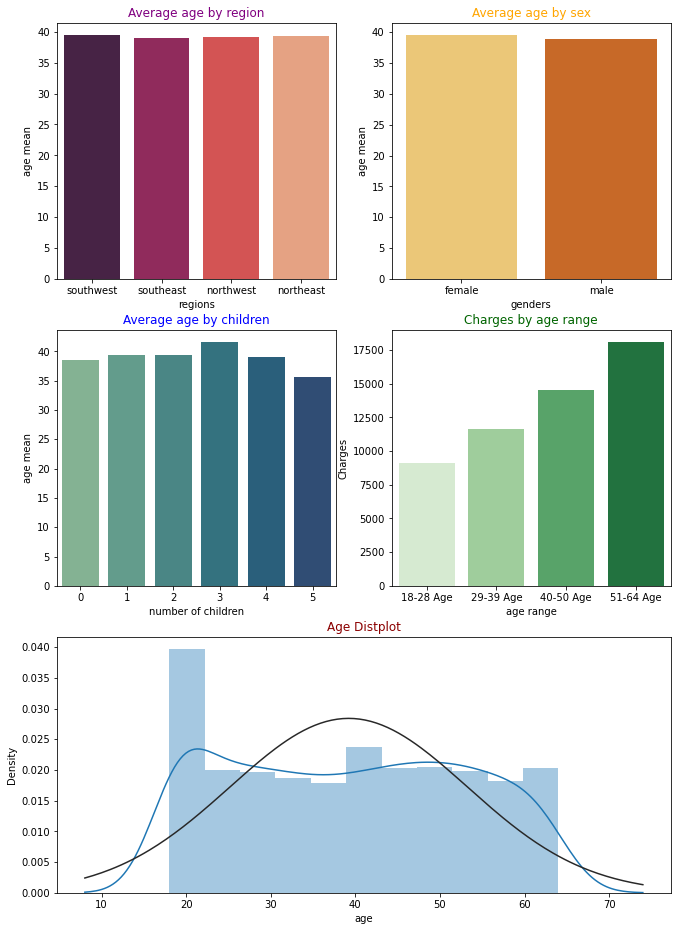

In [62]:
from scipy.stats import norm, boxcox
from scipy import stats

plt.figure(figsize=(11,16))
plt.subplot(3,2,1)
sns.barplot(x = regions, y = regionAgeMean, palette= "rocket")
plt.title("Average age by region", color = "purple")
plt.xlabel("regions")
plt.ylabel("age mean")
plt.subplot(3,2,2)
sns.barplot(x = genders, y = sexAgeMean, palette="YlOrBr")
plt.title("Average age by sex", color = "orange")
plt.xlabel("genders")
plt.ylabel("age mean")
plt.subplot(3,2,3)
sns.barplot(x = children, y = childAgeMean, palette="crest")
plt.title("Average age by children", color = "blue")
plt.xlabel("number of children")
plt.ylabel("age mean")
plt.subplot(3,2,4)
sns.barplot(x=ageRanges, y=averageAge, palette="Greens")
plt.title("Charges by age range", color = "darkgreen")
plt.xlabel("age range")
plt.ylabel("Charges")
plt.subplot(3,2,(5,6))
sns.distplot(df["age"], fit=norm)
plt.title("Age Distplot", color = "darkred")

plt.show()

Analysis:
We examined the age feature from different angles.

In the first graph, we see that the average age by regions does not differ much.

In the second graph, we see that there is not a huge difference in the average age by gender.

In the third graph, we looked at the average age by the number of children. We see that people with 5 children have a lower average age.

In the fourth graph, we see the wages paid according to the average age. We see that the wages paid increase as the age gets older. The highest wages appear between the ages of 51-64. We can use this in the model section.

In the last graph, we see the distribution of age characteristics according to the normal distribution. In fact, there does not seem to be a big difference with the normal distribution, but it can still be corrected.


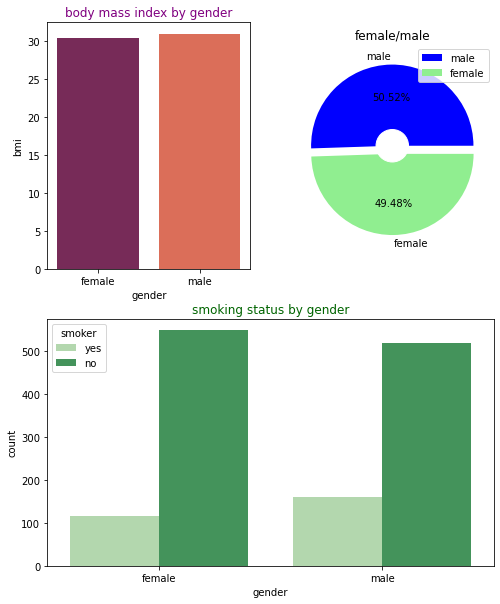

In [63]:
bodyMassIndex = []
for i in genders:
    sex = df[df["sex"] == i]
    bmi = sex["bmi"].mean()
    bodyMassIndex.append(bmi)
    
totalNumber = df.sex.value_counts().values
genderLabel = df.sex.value_counts().index
circle = plt.Circle((0,0),0.2,color = "white") 
explode = (0, 0.1)

plt.figure(figsize=(8,10))
plt.subplot(2,2,1)
sns.barplot(x = genders, y = bodyMassIndex, palette= "rocket")
plt.title("body mass index by gender", color = "purple")
plt.xlabel("gender")
plt.ylabel("bmi")
plt.subplot(2,2,2)
plt.pie(totalNumber, labels = genderLabel,autopct='%1.2f%%', explode = explode, colors=['blue','lightgreen'])
p = plt.gcf()
p.gca().add_artist(circle) 
plt.title("female/male")
plt.legend()
plt.subplot(2,2,(3,4))
sns.countplot(x = 'sex', hue = 'smoker', data = df, palette="Greens")
plt.title("smoking status by gender", color = "darkgreen")
plt.xlabel("gender")
plt.show()

Analysis:
    In the first graph we are looking at the effect of gender on bmi. There doesn't seem to be much difference.

In the second graph, we look at the gender distribution.

In the last graph, we examined the smoking status by gender. they look close to each other as men and women.


C:\Users\zahed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'bmi Distplot')

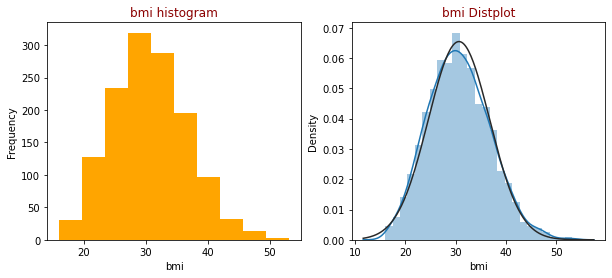

In [65]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df["bmi"], color="orange")
plt.xlabel("bmi")
plt.ylabel("Frequency")
plt.title("bmi histogram", color = "darkred")
plt.subplot(1,2,2)
sns.distplot(df["bmi"], fit=norm)
plt.title("bmi Distplot", color = "darkred")

Analysis: In the first graph we look at the distribution of bmi.

We can see from the first graph that it actually has a nice distribution. We supported this with the second chart. Almost the same as the normal distribution. So there is no need to do anything here.

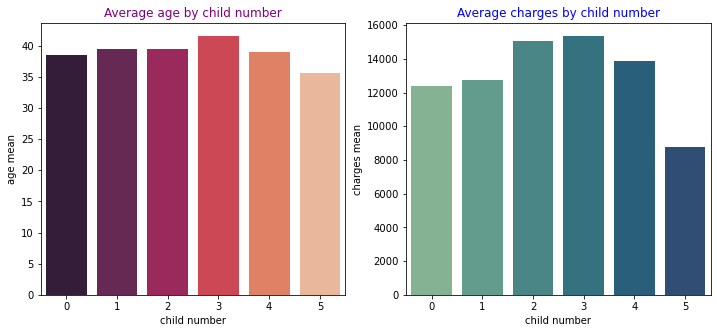

In [67]:
childNumber = []
childCharges = []

for each in children:
    child = df[df["children"] == each]
    xx = child["age"].mean()
    yy = child["charges"].mean()
    childNumber.append(xx)
    childCharges.append(yy)
    
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x = children, y = childNumber, palette= "rocket")
plt.title("Average age by child number", color = "purple")
plt.xlabel("child number")
plt.ylabel("age mean")
plt.subplot(1,2,2)
sns.barplot(x = children, y = childCharges, palette="crest")
plt.title("Average charges by child number", color = "blue")
plt.xlabel("child number")
plt.ylabel("charges mean")

plt.show()

Analysis:
    We also examined the first graph in the age section. In the second graph, we look at the effect of the number of children on the wages paid. Here, we see that the wage paid by those with 5 children is lower than the others.Let's make a note here. We can use this in the feature review section.

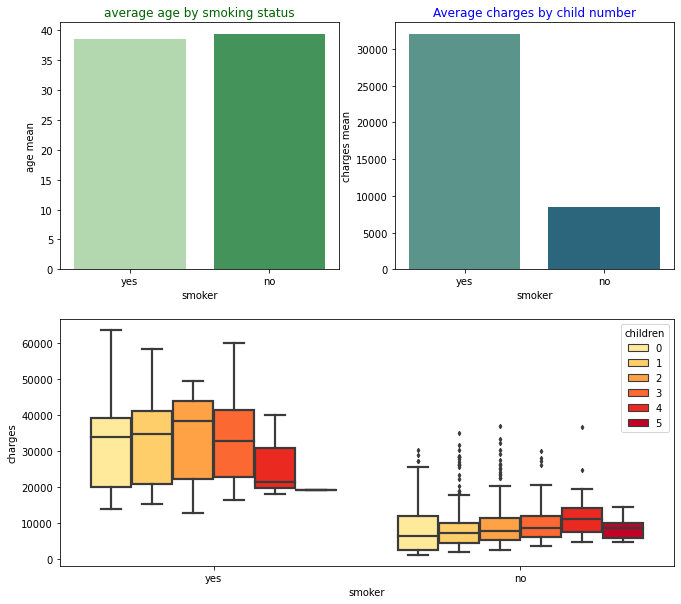

In [69]:
smoker = ["yes", "no"]

smokerAge = []
smokerCharges = []

for each in smoker:
    smokerDistinction = df[df["smoker"] == each]
    xxx = smokerDistinction["age"].mean()
    yyy = smokerDistinction["charges"].mean()
    smokerAge.append(xxx)
    smokerCharges.append(yyy)

    
plt.figure(figsize=(11,10))
plt.subplot(2,2,1)
sns.barplot(x = smoker, y = smokerAge, palette= "Greens")
plt.title("average age by smoking status", color = "darkgreen")
plt.xlabel("smoker")
plt.ylabel("age mean")
plt.subplot(2,2,2)
sns.barplot(x = smoker, y = smokerCharges, palette="crest")
plt.title("Average charges by child number", color = "blue")
plt.xlabel("smoker")
plt.ylabel("charges mean")
plt.subplot(2,2,(3,4))
sns.boxplot(x="smoker", y="charges", hue="children", linewidth=2.2, fliersize= 3.2 ,data=df, saturation=1, palette="YlOrRd")

plt.show()

In the first graph, the average age of smokers and non-smokers is looked at.

In the second graph, we look at the impact of smoking status on wages. Here we see that smokers pay much more than non-smokers.

In the third graph, we see how the smoking status and also how the number of children affected wages.


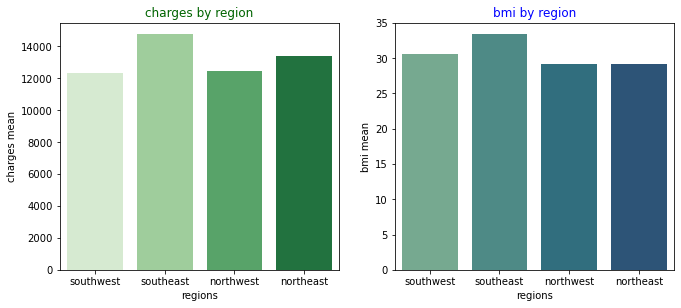

In [70]:
regionCharges = []
regionBmi = []

for each in regions:
    regionn = df[df["region"] == each]
    bmiRegion = regionn["bmi"].mean()
    chargesRegion = regionn["charges"].mean()
    regionCharges.append(chargesRegion)
    regionBmi.append(bmiRegion)
    
plt.figure(figsize=(11,10))
plt.subplot(2,2,1)
sns.barplot(x = regions, y = regionCharges, palette= "Greens")
plt.title("charges by region", color = "darkgreen")
plt.xlabel("regions")
plt.ylabel("charges mean")
plt.subplot(2,2,2)
sns.barplot(x = regions, y = regionBmi, palette="crest")
plt.title("bmi by region", color = "blue")
plt.xlabel("regions")
plt.ylabel("bmi mean")

plt.show()

In the first graph, we see the average wage paid by region. Southeast also we see that the wage paid is higher than the others.

In the second graph, we look at the bmi by region.

C:\Users\zahed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


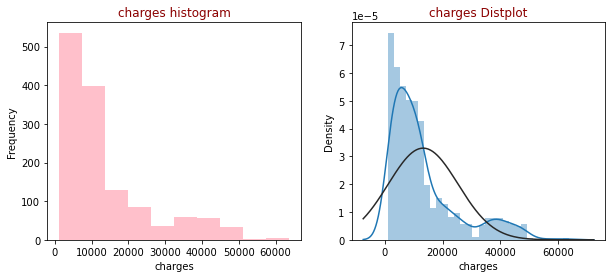

In [71]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df["charges"], color="pink")
plt.xlabel("charges")
plt.ylabel("Frequency")
plt.title("charges histogram", color = "darkred")
plt.subplot(1,2,2)
sns.distplot(df["charges"], fit=norm)
plt.title("charges Distplot", color = "darkred")

plt.show()

We take a look at the charges distribution. On the second graph we can see more clearly that there is a tail to the right. We can edit this in the feature review section. It will make our model better.

this is called positive skewness or right skewness.
